In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import tqdm as tqdm
import matplotlib.pyplot as plt

In [22]:
inputs = np.array([[0, 0, 0, 1, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0]], dtype='float32')
targets = np.array([[0, 0, 0, 1, 0.99, 0.99**2, 0],
                   [0, 0, 0, 0, 1, 0.99, 0],
                   [0, 0, 0, 0, 0, 1, 0]], dtype='float32')
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

In [38]:
class LinearNet(nn.Module):
    def __init__(self, in_size=7, out_size=7):
        super(LinearNet, self).__init__()
        self.layer = nn.Linear(in_size, out_size) 
        # y = w x + b
        # w_ = sqrt(w)
        # y = w_ x + b

    def forward(self, x):
        y = self.layer(x)
        return y

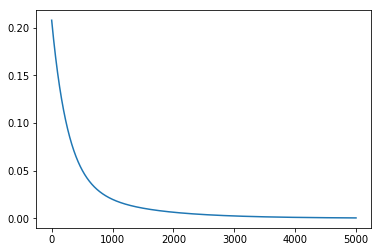

In [43]:
model = LinearNet()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_vec = []

for t in range(5000):
    
    y_pred = model(inputs)

    # Compute and print loss
    loss = (y_pred - targets).pow(2).mul(0.5).mean()
    
    loss_vec.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(loss_vec)

In [46]:
import numpy as np
A = np.array([[0.6, 0.4],[0.6,0.4]])

In [47]:
np.linalg.eig(A)

(array([1., 0.]), array([[ 0.70710678, -0.5547002 ],
        [ 0.70710678,  0.83205029]]))

In [45]:
v = np.identity(2)
for i in range(10):
    print(v)
    v = v @ A

[[1. 0.]
 [0. 1.]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.6 0.4]
 [0.6 0.4]]


### Ratio state count plots

In [197]:
np.array([0.6, 0.4]) @ P

array([0.6, 0.4])

In [233]:
import matplotlib.pyplot as plt
import scipy
P = np.array([[0.6, 0.4], [0.6, 0.4]])
start = 0
STEPS = 2000

In [184]:
state = start
store = np.random.rand(STEPS)
for i in range(STEPS):
    state = np.argmax(np.random.multinomial(1, P[state]))
    store[i] = state

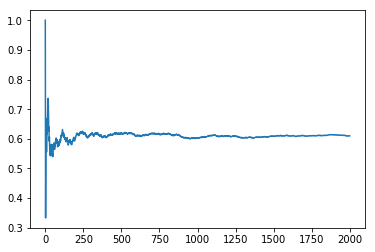

In [185]:
count0 = np.cumsum(store==0)
count1 = np.cumsum(store==1)
plt.plot(np.divide(count0, count0+count1))
plt.show()

In [177]:
# pi = np.array([[0.6, 0.4],[0.4,0.6]])
# P = np.array([[[1,0],[0,1]],[[0,1],[1,0]]])

pi = np.array([[1, 0],[1,0]])
P = np.array([[[0.6,0.4],[0.6,0.4]],[[0,1],[1,0]]])
P_pi = np.vstack([np.dot(pi[i],P[:,i,:]) for i in range(2)])

In [209]:
P_pi

array([[0.6, 0.4],
       [0.6, 0.4]])

In [240]:
ss = scipy.linalg.eig(P_pi, left=True,right=False)[1][1]
ss = ss/np.sum(ss)
print(ss)

[0.43960781 0.56039219]
